In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go
from scenario import*
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual

In [22]:
scenarios = []
def extract_scenarios_from_text_files(directory):
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            source_dir = os.path.join(root, dir)
            for file in os.listdir(source_dir):
                print(file)
                if file.endswith('.txt'):
                    file_path = os.path.join(source_dir, file)
                    try:
                        scenario = Scenario(file_path)
                        scenarios.append(scenario)
                    except Exception as e:
                        print(f"An error occurred while processing {file_path}: {e}")
                        continue
    return scenarios

def scenarios_to_dataframe(scenarios):
    data_dicts = [scenario.to_dict() for scenario in scenarios]
    return pd.DataFrame(data_dicts)

def plot_interactive(df):
    def update_plot(x, y):
        fig = px.scatter(df, x=x, y=y, title=f'{x} vs {y}', labels={x: x, y: y})
        fig.show()

    columns = df.columns
    interact(update_plot, x=columns, y=columns)



In [1]:

# Example usage
logs_directory = r'data\coaxial'
scenarios = extract_scenarios_from_text_files(logs_directory)
data_frame = scenarios_to_dataframe(scenarios)

if not data_frame.empty:
    plot_interactive(data_frame)
else:
    print("No data available for plotting.")

NameError: name 'extract_scenarios_from_text_files' is not defined

In [23]:
# Extracting of scenarios from indoor logs

indoor_directory = r'data\indoor\logs'

scenarios_indoor = extract_scenarios_from_text_files(indoor_directory)

scenarios_indoor_1M = []
scenarios_indoor_2M = []
for scenario in scenarios_indoor:
    if scenario.bandwidth == '1M':
        scenarios_indoor_1M.append(scenario)
    elif scenario.bandwidth == '2M':
        scenarios_indoor_2M.append(scenario)

print('success extracting scenarios for indoor setting')

BC_tests
CO_tests
BC_tests
CO_tests
point_floor_1_1Mhz_indoor_1621.txt
point_floor_2_1Mhz_indoor_1624.txt
point_floor_2_1Mhz_indoor_1637.txt
point_floor_2_1Mhz_indoor_1638.txt
point_floor_2_1Mhz_indoor_1640.txt
point_floor_3_1Mhz_indoor_1629.txt
point_floor_3_1Mhz_indoor_1631.txt
point_floor_4_1Mhz_indoor_1644.txt
point_floor_4_mv_1Mhz_indoor_1645.txt
point_A_1Mhz_indoor_1544.txt
point_B_1Mhz_indoor_1547.txt
point_C_1Mhz_indoor_1550.txt
point_C_1Mhz_indoor_1552.txt
point_D_1Mhz_indoor_1554.txt
point_D_1Mhz_indoor_1557.txt
point_E_1Mhz_indoor_1600.txt
point_E_1Mhz_indoor_1605.txt
point_E_fixed_10_1Mhz_indoor_1615.txt
point_floor_0_2Mhz_indoor_1621.txt
point_floor_1_2Mhz_indoor_1625.txt
point_floor_1_2Mhz_indoor_1627.txt
point_floor_1_2Mhz_indoor_1628.txt
point_floor_1_2Mhz_indoor_1646.txt
point_floor_1_mov_2Mhz_indoor_1648.txt
point_floor_2_2Mhz_indoor_1651.txt
point_floor_2_mov_2Mhz_indoor_1653.txt
point_floor_3_2Mhz_indoor_1656.txt
point_floor_3_mov_2Mhz_indoor_1657.txt
point_floor_4_

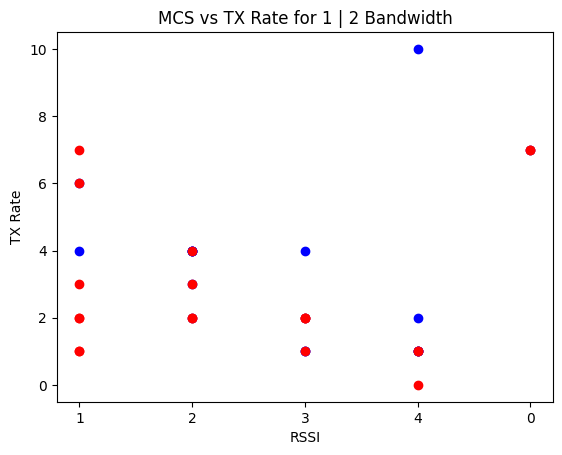

[4, 2, 4, 4, 3, 4, 2, 2, 1, 7, 6, 4, 4, 1, 1, 1, 1, 10]
[7, 1, 2, 1, 3, 2, 4, 2, 1, 2, 0, 1, 7, 7, 6, 2, 3, 2, 2, 1]


In [29]:
mcs_1m =[]
tx_rate_1m = []
mcs_2m =[]
tx_rate_2m = []

for scenario in scenarios_indoor_1M:
    mcs_1m.append(scenario.walls)
    tx_rate_1m.append(scenario.mcs)

for scenario in scenarios_indoor_2M:
    mcs_2m.append(scenario.walls)
    tx_rate_2m.append(scenario.mcs)

plt.scatter(mcs_1m, tx_rate_1m, color='blue')
plt.scatter(mcs_2m, tx_rate_2m, color='red')
plt.xlabel('RSSI')
plt.ylabel('TX Rate')
plt.title('MCS vs TX Rate for 1 | 2 Bandwidth')

plt.show()

print(tx_rate_1m)
print(tx_rate_2m)